### 6.1 현대 포트폴리오 이론

6.1.2 효율적 투자선

###### 시총 상위 4종목으로 효율적 투자선 구하기

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', 'POSCO홀딩스', '현대자동차', '에코프로비엠']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2020-01-01', '2022-4-29')['close']

In [9]:
df

,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
date,,,,,
2020-01-02,55200,94700,236000,118000,53000
2020-01-03,55500,94500,237000,116000,51300
2020-01-06,55500,94300,231000,116000,51300
2020-01-07,55800,94000,232000,115500,52300
2020-01-08,56800,97400,228000,112000,50000
...,...,...,...,...,...
2022-04-25,66300,108000,286000,182000,455200
2022-04-26,66100,111000,284000,187000,450700
2022-04-27,65000,108500,278000,187000,449800


In [10]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []

In [11]:
daily_ret

,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.005435,-0.002112,0.004237,-0.016949,-0.032075
2020-01-06,0.000000,-0.002116,-0.025316,0.000000,0.000000
2020-01-07,0.005405,-0.003181,0.004329,-0.004310,0.019493
2020-01-08,0.017921,0.036170,-0.017241,-0.030303,-0.043977
...,...,...,...,...,...
2022-04-25,-0.010448,-0.022624,-0.032149,0.011111,-0.039054
2022-04-26,-0.003017,0.027778,-0.006993,0.027473,-0.009886
2022-04-27,-0.016641,-0.022523,-0.021127,0.000000,-0.001997


In [12]:
annual_ret

삼성전자        0.124016
SK하이닉스      0.148401
POSCO홀딩스    0.153502
현대자동차       0.281621
에코프로비엠      1.125075
dtype: float64

In [13]:
daily_cov

,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
삼성전자,0.000292,0.000298,0.000187,0.000251,0.000179
SK하이닉스,0.000298,0.000584,0.000212,0.000273,0.000210
POSCO홀딩스,0.000187,0.000212,0.000517,0.000250,0.000130
현대자동차,0.000251,0.000273,0.000250,0.000669,0.000241
에코프로비엠,0.000179,0.000210,0.000130,0.000241,0.001292


In [14]:
annual_cov

,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
삼성전자,0.073642,0.075091,0.047023,0.063143,0.045076
SK하이닉스,0.075091,0.147234,0.053539,0.068876,0.052961
POSCO홀딩스,0.047023,0.053539,0.130265,0.063094,0.032728
현대자동차,0.063143,0.068876,0.063094,0.168710,0.060737
에코프로비엠,0.045076,0.052961,0.032728,0.060737,0.325617


###### 몬테카를로 시뮬레이션

In [15]:
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = { 'Returns': port_ret, 'Risk': port_risk }
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [16]:
weights

array([0.41207737, 0.10537475, 0.01603007, 0.05614338, 0.41037443])

In [9]:
weights

array([0.23024001, 0.185726  , 0.13407476, 0.29035074, 0.15960849])

In [10]:
portfolio

{'Returns': [0.15201901160815673, 0.2714328532562812, 0.1521793486595481],
 'Risk': [0.2761305047947069, 0.34467136239142965, 0.2742791036663665],
 '삼성전자': [0.1699989764168624, 0.0593482586266621, 0.2302400069025757],
 'SK하이닉스': [0.24110434960357166, 0.030785950937888266, 0.18572599964289843],
 'POSCO홀딩스': [0.2842366313801416, 0.15132336862567053, 0.13407475874281186],
 '현대자동차': [0.1244532195399236, 0.4051759167937114, 0.29035074486702006],
 '에코프로비엠': [0.18020682305950067, 0.3533665050160678, 0.1596084898446939]}

In [17]:
df

,Returns,Risk,삼성전자,SK하이닉스,POSCO홀딩스,현대자동차,에코프로비엠
0,0.366912,0.288968,0.161654,0.345845,0.156433,0.126354,0.209714
1,0.243278,0.262760,0.632708,0.037500,0.079433,0.159604,0.090755
2,0.413965,0.287210,0.205520,0.144923,0.181164,0.222675,0.245719
3,0.278260,0.280125,0.161110,0.092812,0.392885,0.252737,0.100457
4,0.479632,0.310119,0.064434,0.320281,0.154085,0.140405,0.320794
...,...,...,...,...,...,...,...
19995,0.196520,0.277831,0.229605,0.270374,0.271027,0.203115,0.025880
19996,0.239946,0.268943,0.297080,0.193453,0.385664,0.028564,0.095238
19997,0.256478,0.314921,0.074550,0.305830,0.076831,0.498693,0.044095
19998,0.470848,0.294971,0.414758,0.088473,0.132596,0.028211,0.335963


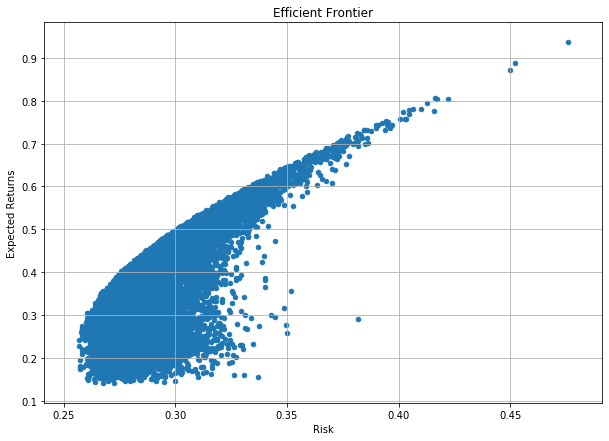

In [18]:
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()